<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Timeseries_tutorial_shampo_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Time Series Machine Learning:** `Time Series Forecasting`

Time series is a sequence of observations recorded at a regular time . The frequency could be yearly, monthly, daily or even milliseconds. It is not necessarily within the same interval.

Forecasting is about predicting the future as accurately as possible, given all of the information available, including historical data and knowledge of any future events that might impact the forecasts. It is a common statistical task in business, where it helps to inform decisions about the scheduling of production, transportation and personnel, and provides a guide to long-term strategic planning.


#### **Time Series Pattern**

The data analysis for time series is inherently different compared to the other data because it is time dependent and it could contain trend, cycle and seasonality.

***Trend***
- A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear. Sometimes we will refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend.

***Seasonal***
- A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency. The monthly sales of antidiabetic drugs above shows seasonality which is induced partly by the change in the cost of the drugs at the end of the calendar year.

***Cyclic***
- A cycle occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. The duration of these fluctuations is usually at least 2 years.

There are a number of patterns that may be formed by time series data. To see these patterns, we can make a line plot with the time component on the x-axis and the variable we are observing on the y-axis.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
# Loading dataset
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/shampo%20sales.csv'
df = pd.read_csv(url)
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


`Random Pattern`

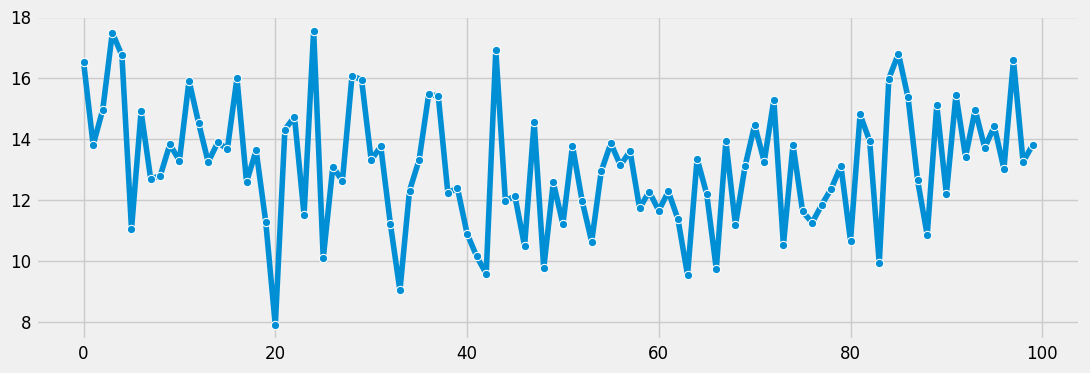

In [4]:
# Random pattern
np.random.seed(0)

X = range(100)  # periode
y = np.random.normal(13,2,100)

plt.figure(figsize=(12,4))
sns.lineplot(x=X,y=y,marker='o',markersize=6)


plt.show()

`Trends`

Increasing or decreasing slope observed in the time series.

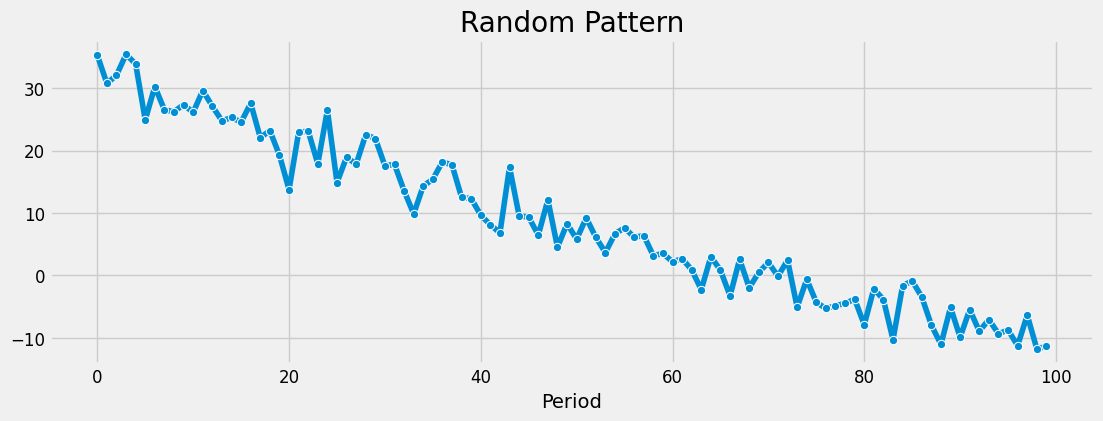

In [5]:
# Trends
np.random.seed(0)

X = range(100)  # periode
y = [30 - 0.43 * i +np.random.normal(0,3,1).item() for i in X]

plt.figure(figsize=(12,4))
sns.lineplot(x=X,y=y,marker='o',markersize=6)
plt.title('Random Pattern')
plt.xlabel('Period')

plt.show()

`Seasonal`

A distinct repeated pattern at fixed period of time. Can be affected by seasonal factors.

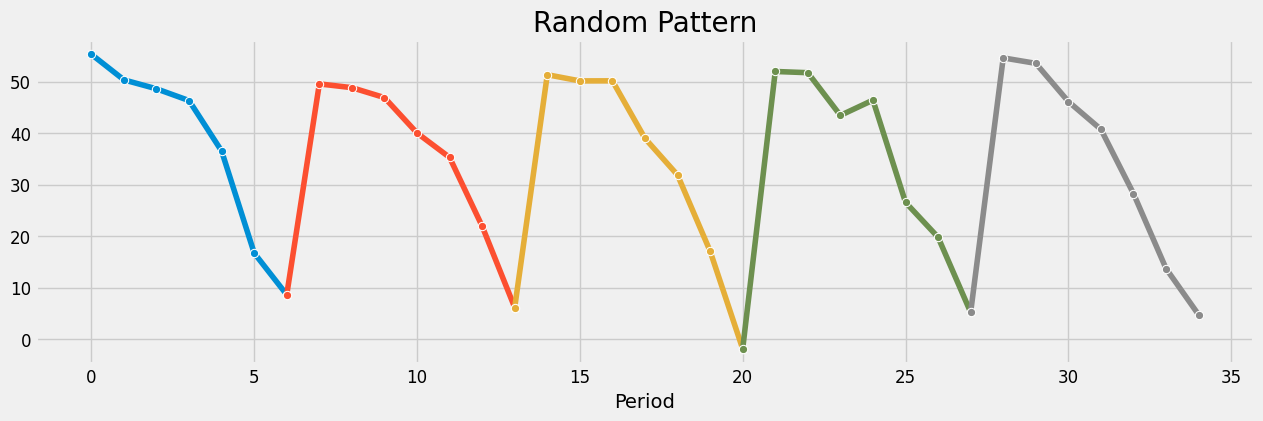

In [6]:
np.random.seed(0)

X = range(35)  # periode
y = [50 + 0.43*(i%7) - 1.3*(i%7)**2 + np.random.normal(0,3,1).item() for i in X]

plt.figure(figsize=(14,4))
for i, j in zip([0,6,13,20,27],[7,14,21,28,35]):
    sns.lineplot(x=X[i:j],y=y[i:j],marker='o',markersize=6)

plt.title('Random Pattern')
plt.xlabel('Period')

plt.show()

#### **Stationarity**

A Time Series is said to be stationary if its statistical properties such as mean, variance remain constant over time. Most of the Time Series models work on the assumption that the TS is stationary. Major reason for this is that there are many ways in which a series can be non-stationary, but only one way for stationarity.

Intuitively, we can say that if a Time Series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

![Stationarity](https://miro.medium.com/v2/resize:fit:1147/1*xdblkZyg6YmmReAkZHUksw.png)

**We can check stationarity using the following:**

- `Augmented Dickey-Fuller Test`: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. Refer this article for details.
- `ACF and PACF plots`: If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.


#### **Example: Shampo Sales Dataset**

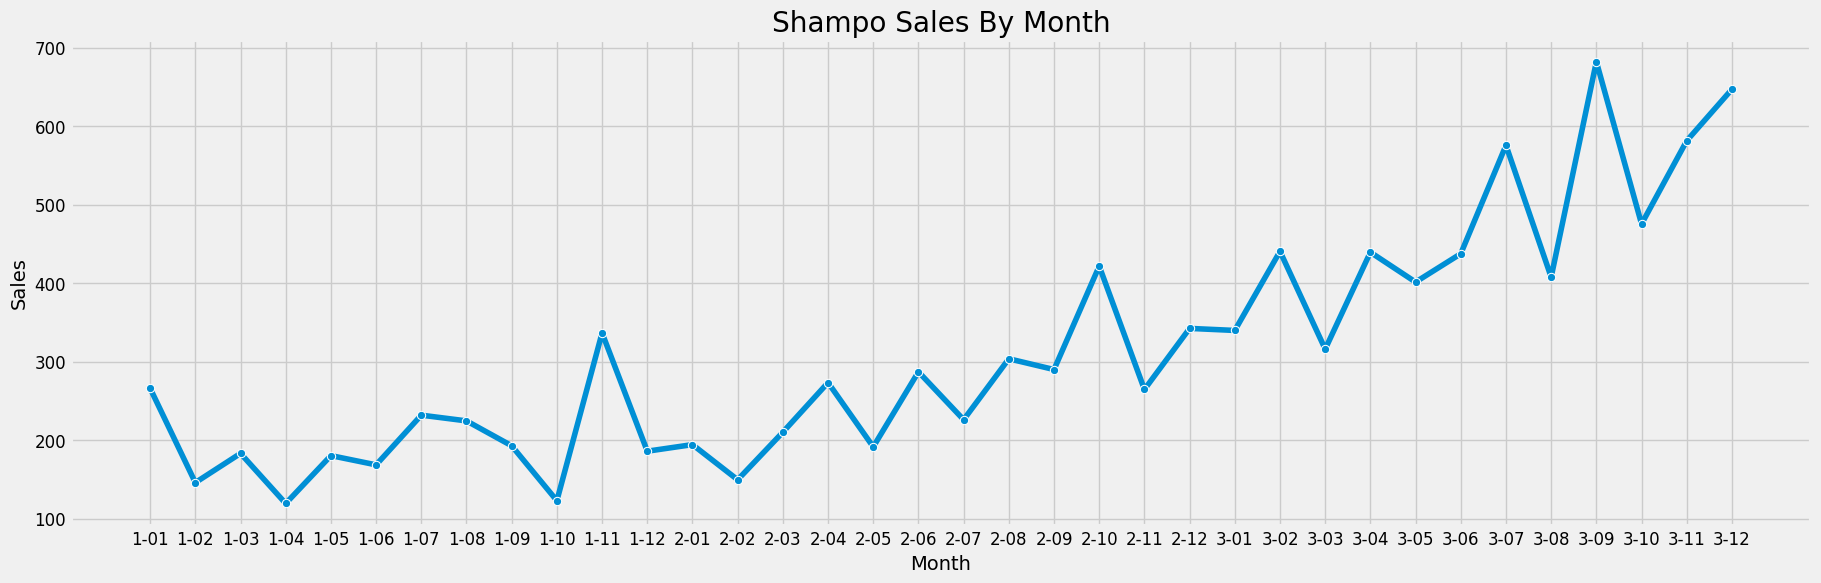

In [7]:
# Shampo sales by month
plt.figure(figsize=(20,6))

sns.lineplot(x=df['Month'],y=df['Sales'],marker='o')

plt.title('Shampo Sales By Month')
plt.show()

`Augmented Dickey-Fuller test`

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- **Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- **Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- **p-value > 0.05**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- **p-value <= 0.05**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Below is an example of calculating the Augmented Dickey-Fuller test on the Shampo Sales dataset. The statsmodels library provides the `adfuller()` function that implements the test.

In [ ]:
# Augmented Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Sales'])

print(f'ADF Statistic : {result[0]}')
print(f'ADF pvalue : {result[1]}')
print(f'Critical value ')
for key,value in result[4].items():
    print(f'\t{key} : {value:.3f}')

# data is not stationer



ADF Statistic : 3.0601420836411815
ADF pvalue : 1.0
Critical value 
	1% : -3.724
	5% : -2.986
	10% : -2.633


Running the example prints the test statistic value of 3.06. The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic value of 3.06 is bigger than the value of -2.633 at 10% with pvalue equal to 1.

This suggests that **we fail to reject the null hypothesis** with a significance level of bigger than 10%.

Fail to reject the null hypothesis means that the process has unit root, and in turn that the time series is **non-stationary** or have time-dependent structure.

`ACF and PACF plots`

If the time series is stationary, the ACF/PACF plots will show a quick drop-off in correlation after a small amount of lag between points.

Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation and not a statistical fluke.

The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

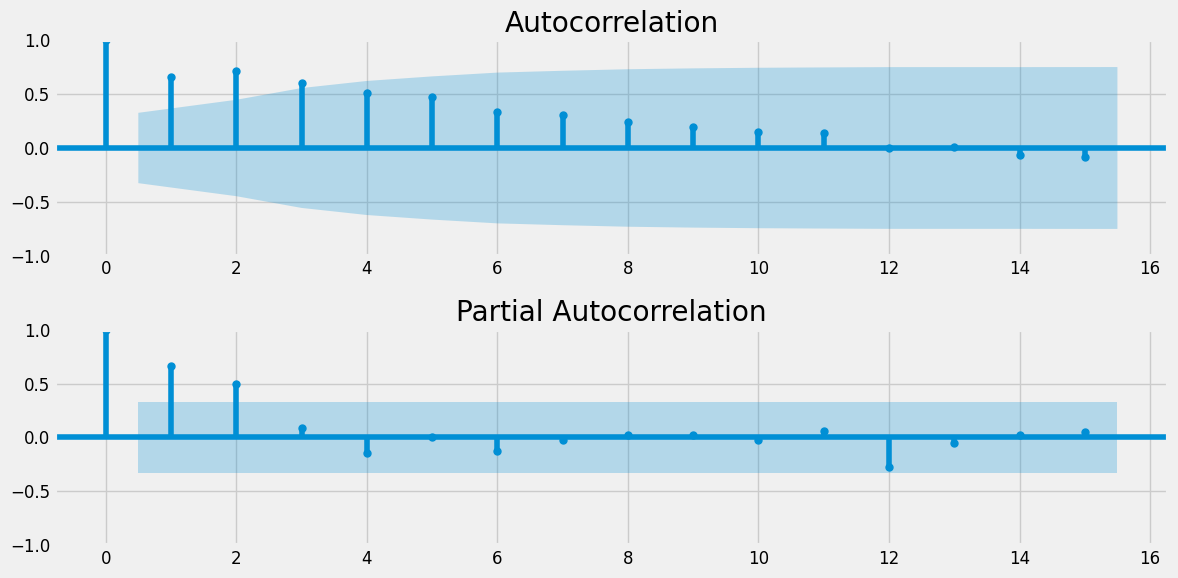

In [8]:
# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12,6))

plt.subplot(211)
plot_acf(df['Sales'],ax=plt.gca(),lags=15)

plt.subplot(212)
plot_pacf(df['Sales'],ax=plt.gca(),lags=15,method='ywm')

plt.tight_layout()

The ACF graph is slowly decaying. This data is non-stationary as a high number of previous observations are correlated with future values.

#### **Making Time Series Stationary**

There are 2 major reasons behind non-stationaruty of a TS:

- Trend – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
- Seasonality – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

There are several techniques to make time series become stationary, one way to make a non-stationary time series stationary by computing the differences between consecutive observations. This is known as differencing.

`Differencing`

We take the difference of the observation at a particular instant with that at the previous instant.

In [9]:
# Differencing

df1 = df.copy()

# Perform level 1 differencing
df1['diff'] = df1['Sales'].diff(1)


# diff level 2 # Perform level 2 differencing # to double the difference
df1['diff2'] = df1['Sales'].diff(1).diff(1)


# Perform level 3 differencing # to double the difference
df1['diff3'] = df1['Sales'].diff(1).diff(1).diff(1)


df1

,Month,Sales,diff,diff2,diff3
0,1-01,266.0,NaN,NaN,NaN
1,1-02,145.9,-120.1,NaN,NaN
2,1-03,183.1,37.2,157.3,NaN
3,1-04,119.3,-63.8,-101.0,-258.3
4,1-05,180.3,61.0,124.8,225.8
5,1-06,168.5,-11.8,-72.8,-197.6
6,1-07,231.8,63.3,75.1,147.9
7,1-08,224.5,-7.3,-70.6,-145.7
8,1-09,192.8,-31.7,-24.4,46.2
9,1-10,122.9,-69.9,-38.2,-13.8


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df1['diff'].dropna())

print(f'ADF Statistic : {result[0]:.3f}')
print(f'ADF pvalue : {result[1]}')
print(f'Critical value ')
for key,value in result[4].items():
    print(f'\t{key} : {value:.3f}')

ADF Statistic : -7.249
ADF pvalue : 1.7998574141687034e-10
Critical value 
	1% : -3.646
	5% : -2.954
	10% : -2.616


This suggests that after first order differencing (d=1), **we can reject the null hypothesis** with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is **stationary** or does not have time-dependent structure.

#### **Autoregressive Integrated Moving Average (ARIMA)**

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p, d, and q.

**Number of AR (Auto-Regressive) terms (p)**

p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values i.e lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).

`ARIMA(1, 0, 0)`

In [10]:
df2 = df.copy()
df2['lag1 sales'] = df2['Sales'].shift(1)

df2.head()

,Month,Sales,lag1 sales
0,1-01,266.0,NaN
1,1-02,145.9,266.0
2,1-03,183.1,145.9
3,1-04,119.3,183.1
4,1-05,180.3,119.3


`ARIMA(2, 0, 0)`

In [11]:
df3 = df.copy()

df3['lag1'] = df3['Sales'].shift(1)
df3['lag2'] = df3['Sales'].shift(2)
df3.head()

,Month,Sales,lag1,lag2
0,1-01,266.0,NaN,NaN
1,1-02,145.9,266.0,NaN
2,1-03,183.1,145.9,266.0
3,1-04,119.3,183.1,145.9
4,1-05,180.3,119.3,183.1


**Number of Differences (d)**

d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series.

`ARIMA(1, 1, 0)`

In [12]:
df4 = df.copy()
df4['sales stationarity'] = df4['Sales'].diff(1)

df4['lag1 sales'] = df4['Sales'].shift(1)
df4['lag1 sales stat'] = df4['sales stationarity'].shift(1)
df4.head()

,Month,Sales,sales stationarity,lag1 sales,lag1 sales stat
0,1-01,266.0,NaN,NaN,NaN
1,1-02,145.9,-120.1,266.0,NaN
2,1-03,183.1,37.2,145.9,-120.1
3,1-04,119.3,-63.8,183.1,37.2
4,1-05,180.3,61.0,119.3,-63.8


**Number of MA (Moving Average) terms (q)**

q is size of the moving average part window of the model i.e. lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.

`ARIMA(0, 0, 1)`

In [13]:
df5 = df.copy()

df5['et = sales - mean(sales)'] = df5['Sales'] - df5['Sales'].mean()
df5['lag1 et'] = df5['et = sales - mean(sales)'].shift(1)
df5 = df5.drop(columns='et = sales - mean(sales)')
df5.head()

,Month,Sales,lag1 et
0,1-01,266.0,NaN
1,1-02,145.9,-46.6
2,1-03,183.1,-166.7
3,1-04,119.3,-129.5
4,1-05,180.3,-193.3


`ARIMA(1, 0, 1)`

In [14]:
df6 = df.copy()

df6['lag 1 sales'] = df6['Sales'].shift(1)

df6.head()

,Month,Sales,lag 1 sales
0,1-01,266.0,NaN
1,1-02,145.9,266.0
2,1-03,183.1,145.9
3,1-04,119.3,183.1
4,1-05,180.3,119.3


In [15]:
import statsmodels.api as sm
model = sm.OLS(df6[1:]['Sales'],sm.add_constant(df6[1:]['lag 1 sales']))


result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     35.42
Date:                Sat, 20 Sep 2025   Prob (F-statistic):           1.11e-06
Time:                        22:56:46   Log-Likelihood:                -211.98
No. Observations:                  35   AIC:                             428.0
Df Residuals:                      33   BIC:                             431.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          78.0456     43.525      1.793      

In [16]:
df6['et - 1']= [np.nan] + list(result.resid)
df6.head()

,Month,Sales,lag 1 sales,et - 1
0,1-01,266.0,NaN,NaN
1,1-02,145.9,266.0,-139.193703
2,1-03,183.1,145.9,-8.510723
3,1-04,119.3,183.1,-101.266317
4,1-05,180.3,119.3,9.394083


#### **Observations from EDA on the time series**

Non stationarity implies at least one level of differencing (d) is required in ARIMA. The next step is to select the lag values for the Autoregression (AR) and Moving Average (MA) parameters, p and q respectively, using PACF, ACF plots.

Model Specification (stationary condition) :

| | AR($p$) | MA($q$) | AR($p$) or MA($q$) | ARMA($p$, $q$) |
|-|-|-|-|-|
|ACF| Tails off (Geometric decay) | Cuts off after lag $q$ | Cuts off after lag $q$ | Tails off (Geometric decay) |
|PACF| Cuts off after lag $p$ | Tails off (Geometric decay) |Cuts off after lag $p$ | Tails off (Geometric decay) |



If the ACF tails off and the PACF cut off, then arima = (p, d, 0)

If the ACF cut off and the PACF tails off, then arima = (0, d, q)

If both cut off, then arima = (p, d, 0) / (0, d, q)

If both tails off, then arima = all free combinations

In [17]:
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


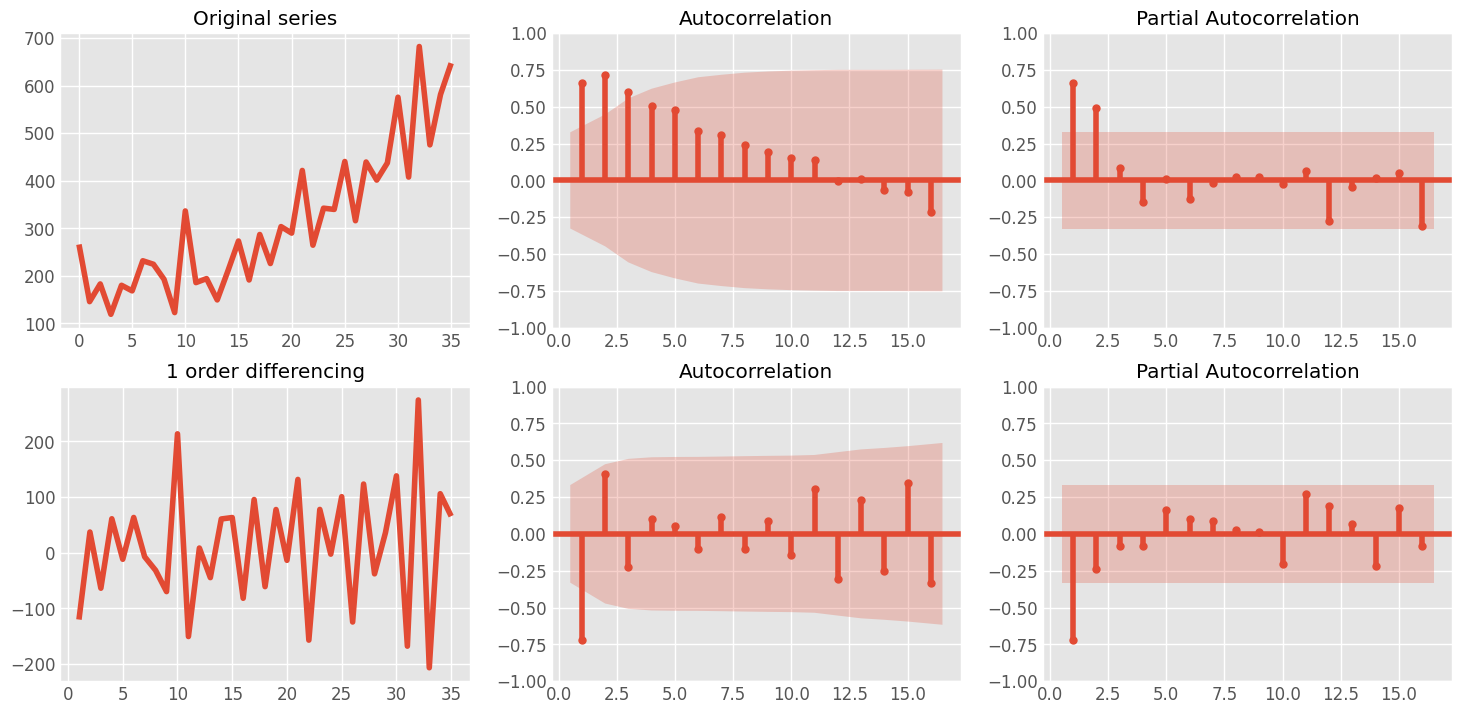

In [18]:
plt.style.use('ggplot')
fig, axes = plt.subplots(2,3,figsize=(16,8))

# original sales
axes[0,0].plot(df['Sales'])
axes[0,0].set_title('Original series')
plot_acf(df['Sales'],ax=axes[0,1],zero=False)
plot_pacf(df['Sales'],ax=axes[0,2],zero=False,method='ywm')


# differencing
axes[1,0].plot(df['Sales'].diff(1))
axes[1,0].set_title('1 order differencing')
plot_acf(df['Sales'].diff(1).dropna(),ax=axes[1,1],zero=False)
plot_pacf(df['Sales'].diff(1).dropna(),ax=axes[1,2],zero=False,method='ywm')


plt.show()

**Summary**

- At differencing level 1, the data is stationary.
- Selecting the best ARIMA(p, d, q) combination based on the ACF-PACF graph:
    - ACF: **cut off** after lag q=1
    - PACF: **cut off** after lag p=1
    - ARIMA(1, 1, 0) or ARIMA(0, 1, 1) model:
        - AR: 1 (due to cut off after lag 1)
        - I : 1 (1st order differentiation)
        - MA : 1 (due to cut off after lag 1)

#### **Building Time Series Forecasting using** `ARIMA`

We now have all of the pieces to modeling using ARIMA.

In [19]:
from statsmodels.tsa.arima.model import ARIMA

`ARIMA(1, 1, 0)`

In [20]:
model = ARIMA(df['Sales'],order=(1,1,0))    # arima initial data, order = p, d, q


# fiting
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -201.287
Date:                Sat, 20 Sep 2025   AIC                            406.575
Time:                        22:59:17   BIC                            409.686
Sample:                             0   HQIC                           407.649
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7142      0.136     -5.259      0.000      -0.980      -0.448
sigma2      5683.4515   1448.557      3.924      0.000    2844.331    8522.572
Ljung-Box (L1) (Q):                   1.89   Jarque-

`ARIMA(0, 1, 1)`

In [21]:
model = ARIMA(df['Sales'],order=(0,1,1))    # arima initial data, order = p, d, q


# fiting
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -204.563
Date:                Sat, 20 Sep 2025   AIC                            413.125
Time:                        22:59:59   BIC                            416.236
Sample:                             0   HQIC                           414.199
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5924      0.176     -3.367      0.001      -0.937      -0.248
sigma2      6904.9684   1640.390      4.209      0.000    3689.862    1.01e+04
Ljung-Box (L1) (Q):                   6.70   Jarque-

`Determine the Optimal parameter using AIC`

The Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:

- the number of independent variables used to build the model.
- the maximum likelihood estimate of the model (how well the model reproduces the data).

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
number_of_lag = range(1,17)
scores_aic = []

for p in number_of_lag:
    # define model
    model = ARIMA(df['Sales'],order=(p,1,0))

    result = model.fit()

    # evaluate model
    scores_aic.append(result.aic)



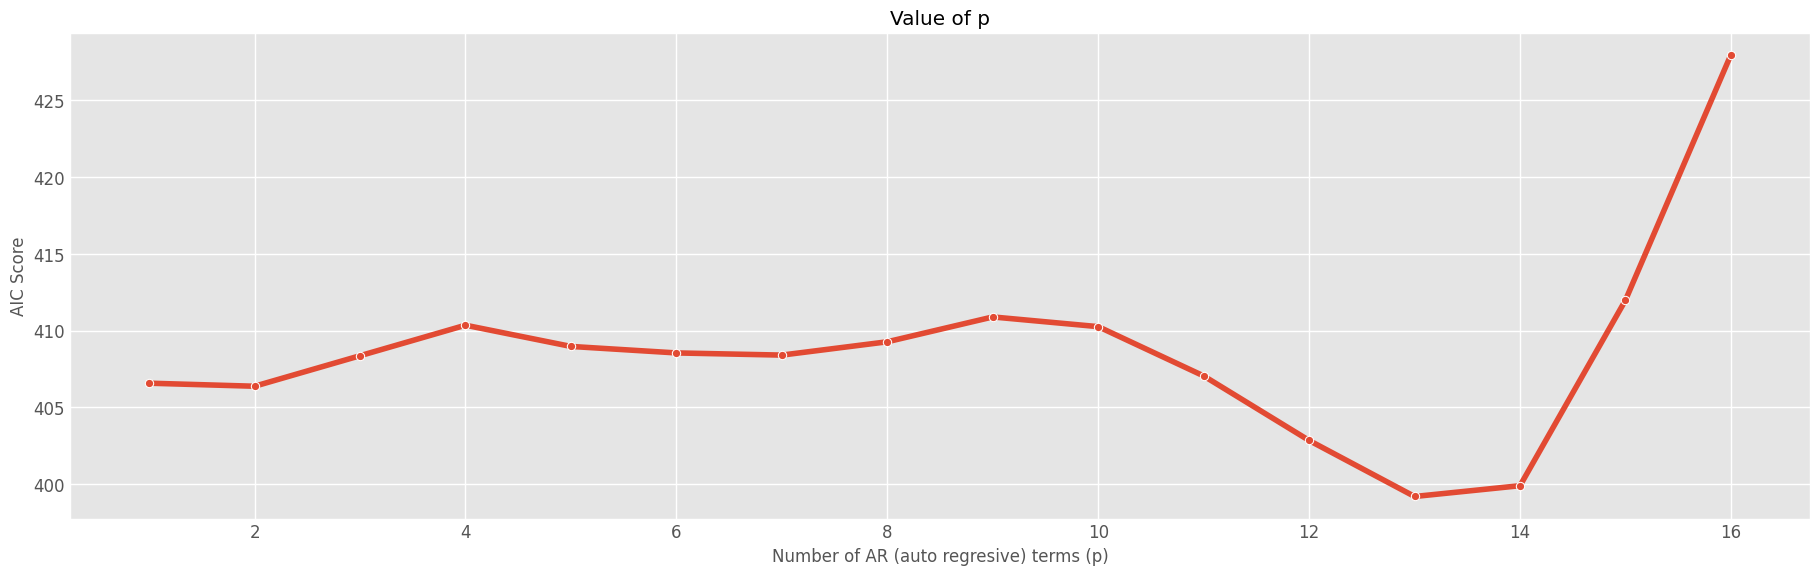

In [24]:
plt.figure(figsize=(20,6))
sns.lineplot(y=scores_aic, x=number_of_lag, marker='o')

plt.xlabel('Number of AR (auto regresive) terms (p)')
plt.ylabel('AIC Score')
plt.title('Value of p')
plt.show()

Now, we will use ARIMA(13, 1, 0) as our final models.

In [25]:
# define final model
best_arima = ARIMA(df['Sales'],order=(13,1,0))

# fititing model
best_model = best_arima.fit()

print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                ARIMA(13, 1, 0)   Log Likelihood                -185.598
Date:                Sat, 20 Sep 2025   AIC                            399.195
Time:                        23:01:39   BIC                            420.970
Sample:                             0   HQIC                           406.712
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4197      0.204     -6.949      0.000      -1.820      -1.019
ar.L2         -0.9251      0.362     -2.558      0.011      -1.634      -0.216
ar.L3          0.0121      0.257      0.047      0.9

#### **Forecasting**

Now we will try to forecast shampoo sales in the next 6 months.

In [26]:
forecast_length = 6

# forecasting
forecast_result = best_model.forecast(forecast_length)

forecast_result

,predicted_mean
36,617.471948
37,576.414315
38,637.347906
39,636.895794
40,713.135816
41,669.133981


Next, we can add the results to the initial dataset and create visualizations to display the results.

In [27]:
forecast_period = [ f'4-0{i+1}' for i in range(6)]

forecast_period

['4-01', '4-02', '4-03', '4-04', '4-05', '4-06']

In [28]:
df_forecast = pd.DataFrame({
    'Month' : forecast_period,
    'Sales' : forecast_result
})

In [29]:
df_forecast = pd.concat([df[-1:],df_forecast])
df_forecast

,Month,Sales
35,3-12,646.900000
36,4-01,617.471948
37,4-02,576.414315
38,4-03,637.347906
39,4-04,636.895794
40,4-05,713.135816
41,4-06,669.133981


In [30]:
# Actual and forecast data

import plotly.graph_objects as go

fig = go.Figure([
    go.Scatter(name='true',x=df['Month'],y=df['Sales'])
])

fig.add_trace(go.Scatter(name='forecast',x=df_forecast['Month'],y=df_forecast['Sales']))

fig.update_xaxes(rangeslider_visible=True)

fig.show()